In [20]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

import argparse
import os
import shutil
import time

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import models
from dataset import UTKDataset
import wandb
import numpy as np
import random
from datetime import datetime
from cautious_extrapolation.utils import AverageMeter, save_checkpoint, kl_divergence_gaussian
from cautious_extrapolation.data_paths import DATA_PATHS
import pandas as pd
from sklearn.model_selection import train_test_split
from cautious_extrapolation.utils import get_imagenet_features
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pickle
import matplotlib.pyplot as plt

/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
dir_path = os.path.dirname(os.path.abspath("__file__"))
dataset_types = ['train', 'ood']

with open(os.path.join(dir_path, "data", "seed2_2023_06_12_18_25_32", "outputs_sn2.pkl"), 'rb') as f:
    data = pickle.load(f)

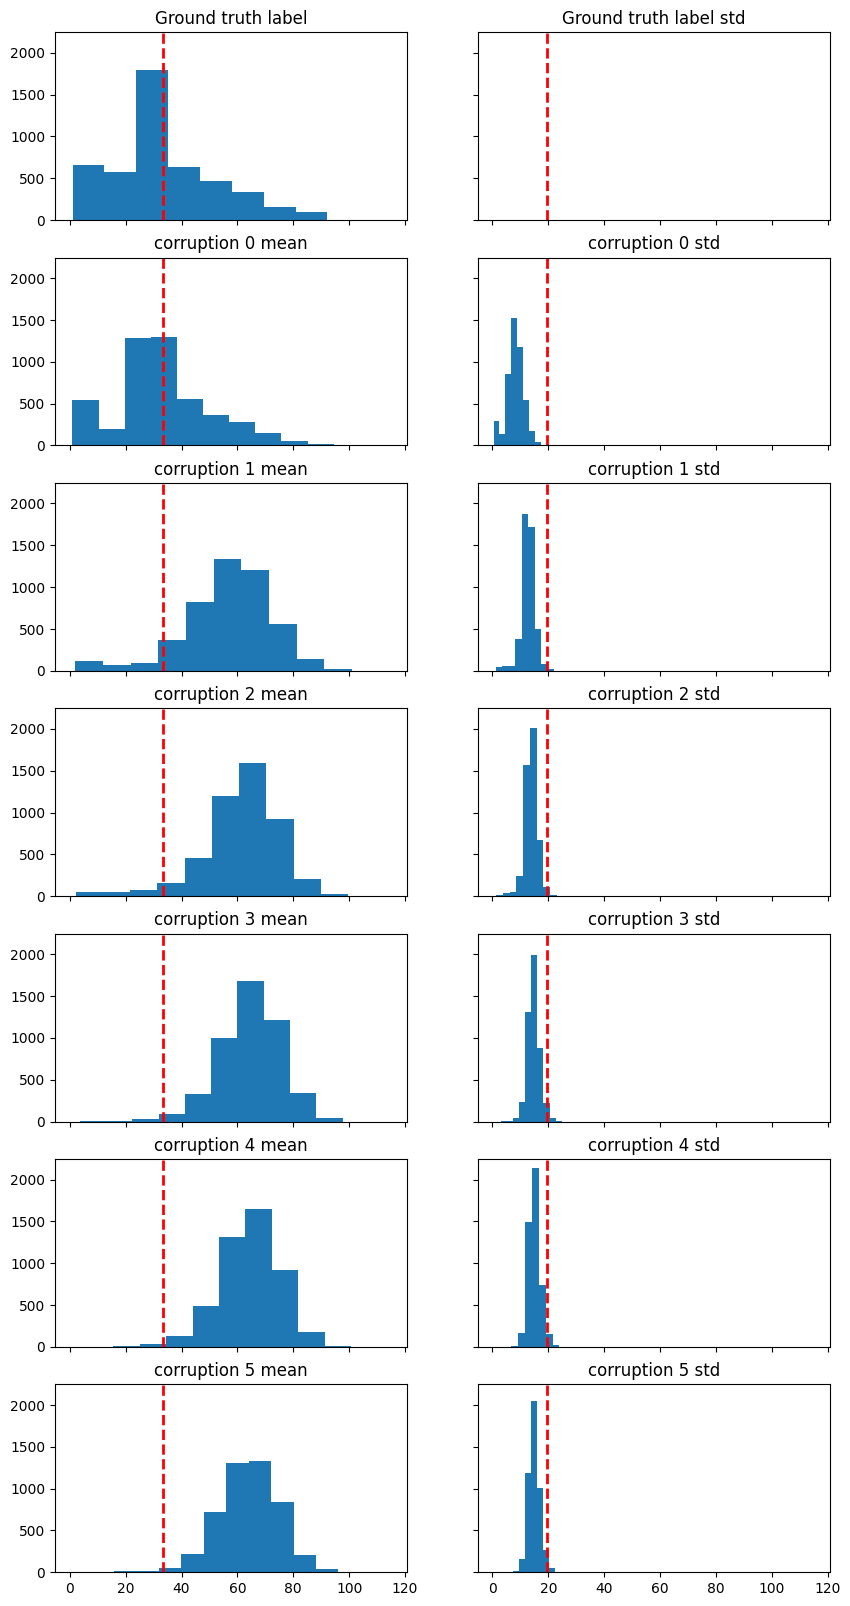

In [56]:
#make 6 x 2 subplot
fig, axs = plt.subplots(7, 2, figsize=(10, 20), sharex=True, sharey=True)
axs[0, 0].hist(dataset.age_label)
axs[0, 0].set_title('Ground truth label')
axs[0, 0].axvline(x=dataset.age_label.mean(), color='r', linestyle='dashed', linewidth=2)
axs[0, 1].axvline(x=dataset.age_label.std(), color='r', linestyle='dashed', linewidth=2)
axs[0, 1].set_title('Ground truth label std')

for i in range(6):
    for j in range(2):
        axs[i+1, j].hist(data[i][:, j])
    axs[i+1, 0].set_title("corruption "+str(i) + ' mean')
    axs[i+1, 1].set_title("corruption "+str(i)+ ' std')
    axs[i+1, 0].axvline(x=dataset.age_label.mean(), color='r', linestyle='dashed', linewidth=2)
    axs[i+1, 1].axvline(x=dataset.age_label.std(), color='r', linestyle='dashed', linewidth=2)

In [25]:

dataFrame = pd.read_csv(os.path.join(DATA_PATHS["nfs"]["UTKFace"], 'age_gender.gz'), compression='gzip')
train_dataFrame, val_dataFrame = train_test_split(dataFrame, test_size=0.2, random_state=42)
dataset = UTKDataset(val_dataFrame)


In [28]:
dataset.age_label.mean()

33.346551360472475

In [29]:
dataset.age_label.std()

19.659555594110707